
### Comparação de Modelos Preditivos


Comparador de desempenho dos algoritmos de classificação k-NN, SVM e RandomForest usando algumas métricas de desempenho.

#### Qualidade de vinhos tintos

#### O conjunto de dados usado neste caderno está disponível em:

https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/vinhos-binario.csv


Descrição dos atributos da base de dados:
- **fixed acidity** (acidez fixa)
- **volatile acidity** (acidez volátil)
- **citric acid** (acidez cítrica)
- **residual sugar** (açúcar residual)
- **chlorides** (cloretos)
- **free sulfur dioxide** (dióxido de enxofre livre)
- **total sulfur dioxide** (dióxido de enxofre total)
- **density** (densidade)
- **pH**
- **sulphates** (sulfatos)
- **alcohol** (álcool)
Atributo classe:
- **quality (score 0 or 1)** (qualidade - pontuação 0 (ruim, notas <= 5) ou 1 (bom, notas > 5))


#### 1. Nesta atividade, usaremos as bibliotecas **scikit-learn**, **pandas** e **matplotlib**. Importe as bibliotecas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize']=[15,10]
plt.rcParams.update({'font.size': 18})

#### 2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 1599 registros.

In [2]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/vinhos-binario.csv'
vinhos = pd.read_csv(url, sep=',')
vinhos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [3]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### 3. Separando os atributos dos rótulos e separando os dados de treinamento (90%) e teste (10%)

In [6]:
vinhos_atributos = vinhos.iloc[:,:11]
vinhos_classes = vinhos['quality']

In [7]:
vinhos_treino, vinhos_teste, classes_treino, classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size = 0.1)

#### 4. Diminuindo a escala dos dados para melhorar o treinamento.

In [8]:
scaler = StandardScaler()
vinhos_treino = scaler.fit_transform(vinhos_treino)
vinhos_teste = scaler.transform(vinhos_teste)

#### 5. Vamos começar com o algoritmo k-NN

In [9]:
modelo_kNN = KNeighborsClassifier(n_neighbors = 20)
modelo_kNN.fit(vinhos_treino, classes_treino)

KNeighborsClassifier(n_neighbors=20)

#### 6. Verificando a acurácia de classificação do k-NN

In [10]:
predicao_kNN = modelo_kNN.predict(vinhos_teste)
acuracia_kNN = accuracy_score(classes_teste, predicao_kNN)
print('Acurácia de classificação k-NN: {}'.format(round(acuracia_kNN, 3)*100)+'%')

Acurácia de classificação k-NN: 72.5%


#### 7. A função **classification_report** traz, além da acurácia, os valores de precisão, revogação e medida F1 obtidas para cada classe

In [11]:
print(classification_report(classes_teste, predicao_kNN))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69        76
           1       0.71      0.81      0.76        84

    accuracy                           0.73       160
   macro avg       0.73      0.72      0.72       160
weighted avg       0.73      0.72      0.72       160



#### 8. Outra forma de avaliar os resultados é usar a validação cruzada, que permite ver a acurácia de classificação com diferentes partições dos dados

In [12]:
cross_val_score(modelo_kNN, vinhos_treino, classes_treino, cv=10)

array([0.70833333, 0.74305556, 0.79166667, 0.65277778, 0.77083333,
       0.78472222, 0.73611111, 0.76388889, 0.6875    , 0.77622378])

#### 9. Vamos olhar também a curva ROC obtida pelo k-NN para esses dados. Aqui, passamos o modelo a ser treinado e os dados de teste para a função **from_estimator** da classe **RocCurveDisplay**. No gráfico gerado, podemos o valor AUC (área sob a curva) obtido. Quanto mais perto de 1.0 (céu ROC), melhor.

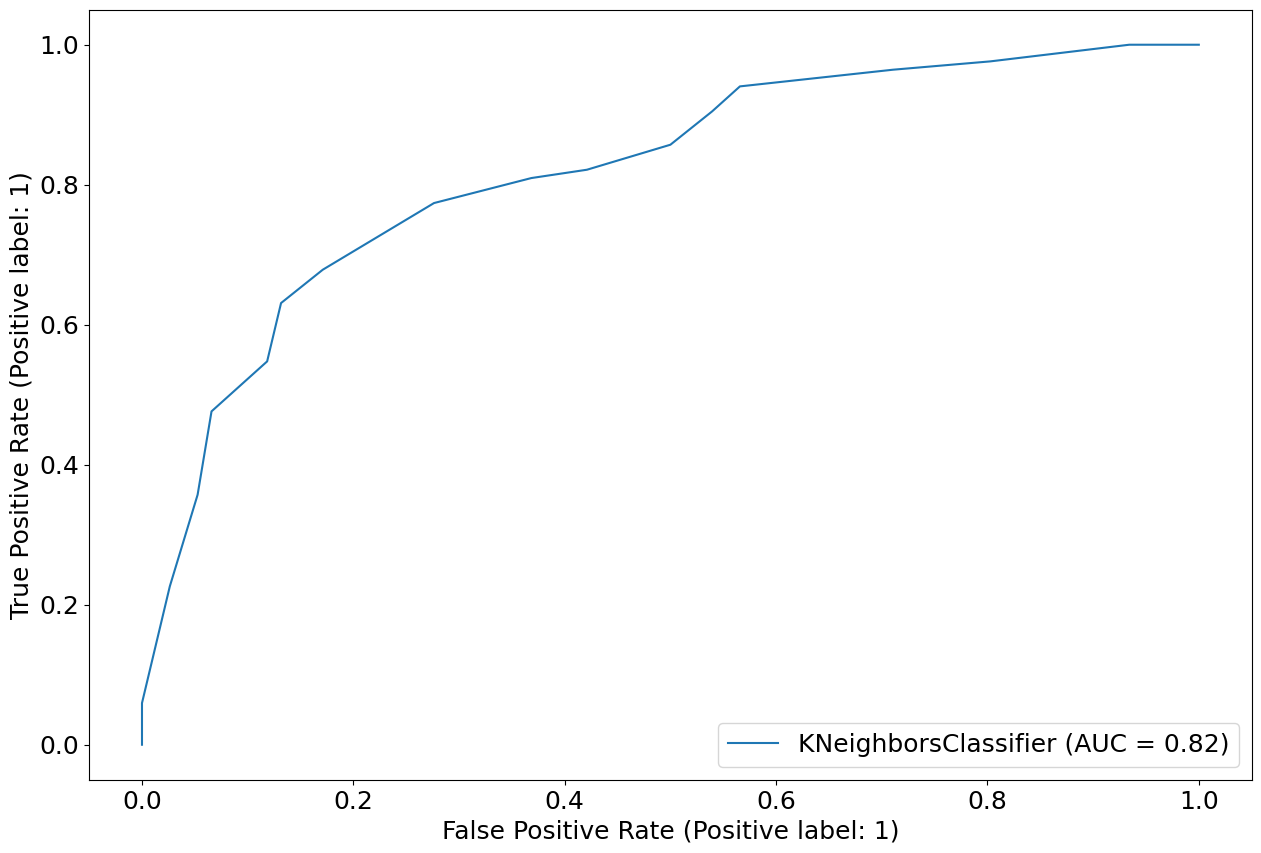

In [13]:
RocCurveDisplay.from_estimator(modelo_kNN.fit(vinhos_treino, classes_treino), vinhos_teste, classes_teste)
plt.show()

#### 10. Vamos classificar usando SVM, treinando o modelo com a função kernel linear.


In [14]:
modelo_SVM = SVC(kernel = 'linear')
modelo_SVM.fit(vinhos_treino, classes_treino)

SVC(kernel='linear')

#### 11. Acurácia de classificação com SVM

In [15]:
predicao_SVM = modelo_SVM.predict(vinhos_teste)
acuracia_SVM = accuracy_score(classes_teste, predicao_SVM)
print('Acurácia de classificação SVM: {}'.format(round(acuracia_SVM,3)*100)+'%')

Acurácia de classificação SVM: 75.6%


#### 12. Precisão, revogação e medida F1

In [16]:
print(classification_report(classes_teste, predicao_SVM))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74        76
           1       0.76      0.79      0.77        84

    accuracy                           0.76       160
   macro avg       0.76      0.75      0.76       160
weighted avg       0.76      0.76      0.76       160



#### 13. Usando validação cruzada

In [17]:
cross_val_score(modelo_SVM, vinhos_treino, classes_treino, cv=10)

array([0.67361111, 0.75      , 0.80555556, 0.72916667, 0.77777778,
       0.75694444, 0.76388889, 0.79166667, 0.66666667, 0.6993007 ])

#### 14. Curva ROC

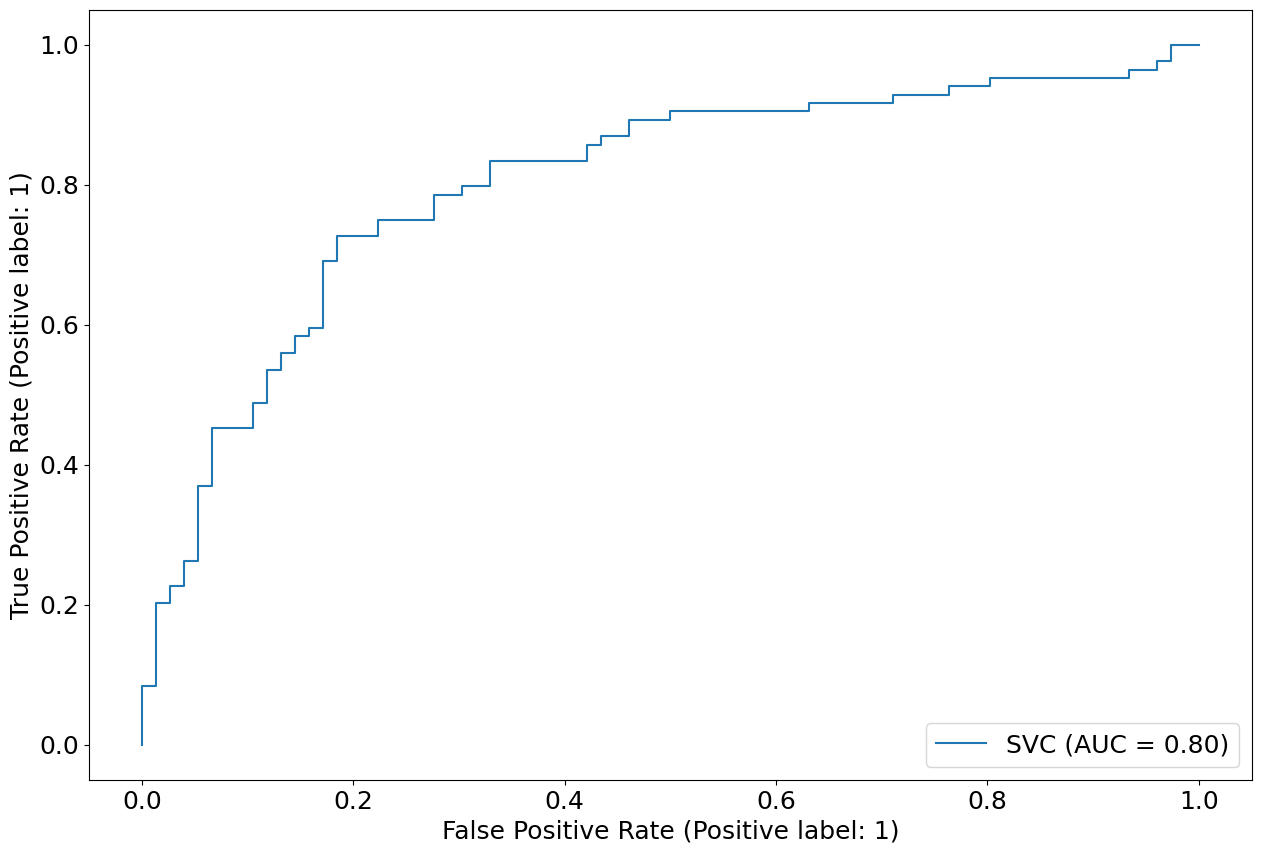

In [18]:
RocCurveDisplay.from_estimator(modelo_SVM.fit(vinhos_treino, classes_treino), vinhos_teste, classes_teste)
plt.show()

#### 15. Vamos fazer a classificação usando o algoritmo Random Forest

In [19]:
modelo_RF = RandomForestClassifier()
modelo_RF.fit(vinhos_treino, classes_treino)

RandomForestClassifier()

#### 16. Acurácia de classificação com Random Forest

In [20]:
predicao_RF = modelo_RF.predict(vinhos_teste)
acuracia_RF = accuracy_score(classes_teste, predicao_RF)
print('Acurácia de classificação RF: {}'.format(round(acuracia_RF,3)*100)+'%')

Acurácia de classificação RF: 81.2%


#### 17. Precisão, revocação e medida F1

In [21]:
print(classification_report(classes_teste, predicao_RF))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        76
           1       0.81      0.85      0.83        84

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



#### 18. Validação cruzada

In [22]:
cross_val_score(modelo_RF, vinhos_treino, classes_treino, cv=10)

array([0.79861111, 0.80555556, 0.81944444, 0.75694444, 0.86111111,
       0.85416667, 0.86111111, 0.82638889, 0.78472222, 0.83216783])

#### 19. Curva ROC

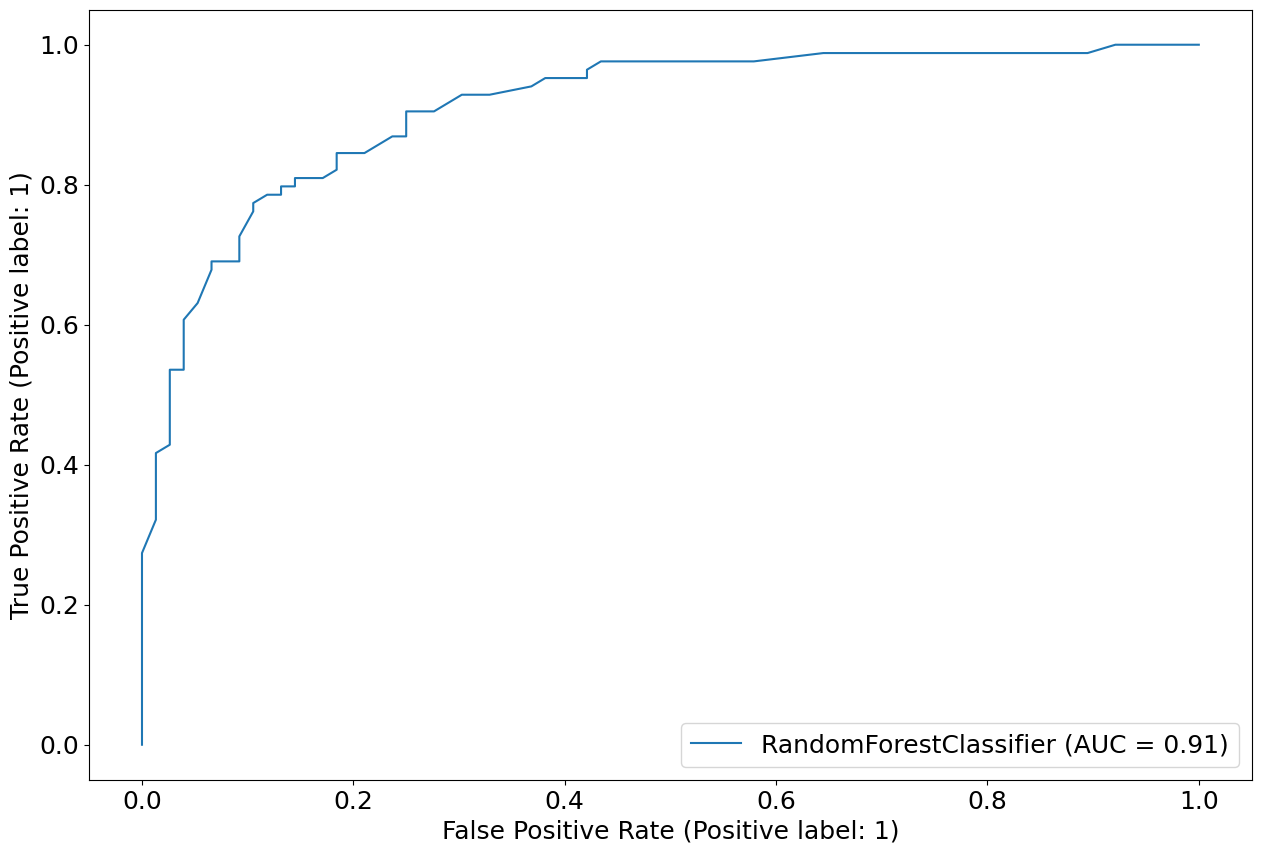

In [23]:
RocCurveDisplay.from_estimator(modelo_RF.fit(vinhos_treino, classes_treino), vinhos_teste, classes_teste)
plt.show()

De forma geral, os resultados obtidos pelos classificadores para as diferentes métricas de desempenho foram parecidos para este conjunto de dados.
